# Sentiment Classification

In [2]:
import pandas as pd
import numpy 
from keras.datasets import imdb 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import LSTM 
from keras.layers.embeddings import Embedding 
from keras.preprocessing import sequence

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)
pd.set_option('display.max_rows', 200)

%matplotlib inline

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility 
numpy.random.seed(7) 

# load the dataset but only keep the top n words, zero the rest 
top_words = 100000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [4]:
import keras
NUM_WORDS=1000 # only use top 1000 words
INDEX_FROM=3   # word index offset
word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in X_train[0] ))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sho

In [6]:
# truncate and pad the review sequences 
max_review_length = 500 
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length) 
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [7]:
# create the model
embedding_vector_length = 32 
model = Sequential() 
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length)) 
model.add(LSTM(100)) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy']) 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           3200000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 3,253,301
Trainable params: 3,253,301
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=64)

Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 545s 22ms/step - loss: 0.0734 - acc: 0.9768 - val_loss: 0.4183 - val_acc: 0.8497


In [44]:
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=0) 

print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 84.97%


In [45]:
from numpy import array
bad = "this movie was terrible and bad"
good = "i really liked the movie and had fun"
for review in [good,bad]:
    tmp = []
    for word in review.split(" "):
        tmp.append(word_to_id[word])
    tmp_padded = sequence.pad_sequences([tmp], maxlen=max_review_length) 
    print("%s . Sentiment: %s" % (review,model.predict(array([tmp_padded][0]))[0][0]))

i really liked the movie and had fun . Sentiment: 0.842157
this movie was terrible and bad . Sentiment: 0.0292481


In [46]:
def predict_sentiment(txt):
    tmp = []
    for word in txt.split(" "):
        try:
            tmp.append(word_to_id[word])
        except:
            tmp.append(word_to_id["<UNK>"])
    tmp_padded = sequence.pad_sequences([tmp], maxlen=max_review_length) 
    return(model.predict(array([tmp_padded][0]))[0][0])

In [47]:
txt = "this is lovely"
predict_sentiment(txt)

0.57323307

In [20]:
df = pd.read_csv('../data/prepared_data.csv')

# We only want to detect sentiment of end users (clients)
df = df[df.participant_anon == 'End-user']

df.text = df.text + ' '
df = pd.DataFrame(data=df[['chat_id', 'text']].groupby(['chat_id']).sum().reset_index())

In [21]:
df.head(n=6)

chat_id  \
0   330558   
1   349710   
2   352898   
3   352900   
4   352901   
5   352903   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text  
0  Hi, I recently paid for Postal redirection and today someone else's post from another address was redirected to me Can you see my last message? My Address the redirection is from: 14 Etna Road, Bury St. Edmunds, Suffolk, IP33 1JF. Redirect to: 20 Tutelina Drive, Great Welneatham, Bury St. Edmunds IP30 0TX DOB: 18/07/1988 I received post meant for 10 Etna Road I didn't provide an email today? only my name. I think it was omniflo@protonmail.com 1 item, recieved today, the name is Charlotte Barrs, the reference on the sticker is 847125910 Does it cost to call that number? How do I get reimbursed for the charge? this is not my mistake. Thank you. What do I do with this reference? Thank you Melanie, my one concern is that my post may have been sent to another address? Ok excellent, Thank yo...  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Hi, I see my account DD is not set up I sent DD mandate about 2 weeks ago Can you check One of invoice is due today Okay. Can you tell me how can I make payment via bank transfer because online payment system is not accepting card   
2                                                                                                                                                                                                                                                                                                                                                   Good morning Maxine.  I have a problem with my online postage  my email address is ma680@le.ac.uk I was wondering if you could please help with changing the details of my postage yes Order number 8350076  The problem is that I want to send a parcel of around 1Kg instead of sending a letter (100 gram) to the same address  Will they be able to help with changing the details, or I should ask for refund and buy a new one? ok, thank you very much goodbye for now   
3                                                                                                                                                                                                                                                                                                                                                                   I uploaded part of my order on Friday night after 8.30pm as I was told that it would not manifest. We didn't complete the orders until Sunday and so want to post today. Does it matter that my order automanifested on Friday? The Cake Tasting Club, 34 Oakhill Road, Horsham, RH13 5SE click and drop Ok, can I create a new manifest

In [22]:
predict_sentiment(df.text[1])

0.91909796

In [23]:
import time
tic = time.time()
df['sentiment'] = df.text.apply(lambda x: predict_sentiment(x))
toc = time.time()
print("Done!\nTotal processing time (secs): {:.3f}\n".format(toc - tic))

Done!
Total processing time (secs): 825.950



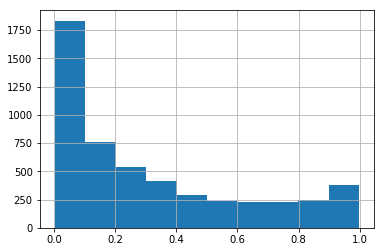

In [26]:
df.sentiment.hist()

In [209]:
df.sort_values('sentiment').head(n=20)

chat_id  \
734    353838   
3146   356832   
4017   357897   
3294   357010   
2825   356425   
3648   357453   
3479   357247   
4543   358584   
2989   356631   
1621   354902   
5042   359192   
4842   358953   
4723   358802   
5034   359176   
9      352907   
4063   357958   
2091   355510   
5113   359277   
4134   358054   
4503   358522   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 text  \
734   hello what the hell is going on with Royal Mail? I have sent items via first class recorded tracked signed for on 19 January and they are still not delivered your online system does not even recognise them KS374658623GB this item suppose to be delivered ages ago waqas ali bhatti 245 burbury street birmingham b19 1tw what do you mean untracked? this is a tracked services it was sent on 19 January 2018 so when is going to be delivered in 2020 so this stupid answer will satisfy my customer who paid for 1st class services and this item sent via first class what timescale this first class services signed for suppose to deliver within 1-2 working days can I have your supervisor or manager contact number please so you mean for my issue I have to ring on this costly number as well to pay for y...   
3146  The royal mail tracking advises us this item should be delivered to yourself or a neighbour\nDelivered\nTracking no. 210302784000000AFFB53\nI asked my neighbours but nobody seeing my parcel.\n\nUsually the postman leaves a note where or in which apartment he left the parcel.\nNeither a note nor a parcel. Apparently there was simply no delivery.\nPlease let me know what happened to my package.\nThank you.\n The royal mail tracking advises us this item should be delivered to yourself or a neighbour\nDelivered\nTracking no. 210302784000000AFFB53\nI asked my neighbours but nobody seeing my parcel.\n\nUsually the postman leaves a note where or in which apartment he left the parcel.\nNeither a note nor a parcel. Apparently there was simply no delivery.\nPlease let me know what happened to my...   
4017                                                                                                                                                                                                                                                    Hi,\nI paid for an address label last night, but unfortunately my printer lost connection and I didn't get to print it.  Now I can't find where to go to reprint it.  My history doesn't show anything after December 2017, however I print 3 or 4 labels a week! Lesley Taylor, 19 Craven Close, Rochford, Essex.  SS4 3DD Yes.\nI login, choose the service I want, pay for it by PayPal and print.\nIt just wouldn't print last night They never answer.\nThis has happened 3 or 4 times and I have lost of £10 on postage, because of it :(\n It's really not acceptable    
3294                                                                                                                                                                                                                                                               Business customer Jonathan Denton, Magnetic Solutions Ltd, Units 3-4 Brooklands Business Park, Leigh Street Sheffield, S9 2PR I've tried applying several

In [29]:
# Load data to which to join results
to_plot = pd.read_csv('../data/to_plot.csv')

In [30]:
to_plot.head()

chat_id  \
0   330558   
1   348315   
2   349710   
3   352898   
4   352900   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              text  \
0  i’m very sorry, i would need to transfer you through to our redirections team to deal with this. please allow a moment while i do so.  hi, i recently paid for postal redirection and today someone else's post from another address was redirected to me can you see my last message? yes chloe, one  moment please ro catch up  ok, i am sorry to hear this, please confirm both addresses and dob ? *to my address the redirection is from: 14 etna road, bury st. edmunds, suffolk, ip33 1jf. redirect to: 20 tutelina drive, great welneatham, bury st. edmunds ip30 0tx dob: 18/07/1988 i received post meant for 10 etna road ok, please also confirm the registration email address as this is separate to the email given today ? i didn't provide an email today? only my name. i think it was omniflo@protonmail....   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  "you're through to business customer services; <br />can i take the business name, address & postcode please?"    
2                                                                                                                                                                                                                                                                                                                                                                                 hi abdul, unfortunately, you have clicked on the dmo tech help live chat link. as such, we are unable to assist with this type of query. please bear with me whilst i transfer you to the team that can. hi, i see my account dd is not set up i sent dd mandate about 2 weeks ago can you check one of invoice is due today okay. can you tell me how can i make payment via bank transfer because online payment system is not accepting card    
3  good morning maxine.  i’m sorry to hear that.<br /><br />can i take your business address including business name and postcode please?<br /><br />please be aware at the end of this chat, you’ll be presented with an option to complete a short survey at the bottom of the page. your feedback is important to us. i have a problem with my online postage  are you referring to online postage? my email address is ma680@le.ac.uk i was wondering if you could please help with changing the details of my postage to get the help and assistance you need you will need to contact online postage on 03456 113 425. i’m sorry but they are not contactable via online chat. yes order number 8350076  i'm sor

In [35]:
merged = to_plot.merge(df[['chat_id', 'sentiment']], how='left', on='chat_id')

In [42]:
# Export data with sentiments
merged.to_csv('../data/to_plot_with_sentiment.csv', index=False)